In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Set up directories
cwd = os.getcwd()
if 'examples' in cwd:
    parent_dir = os.path.dirname(cwd)
    data_dir = os.path.join(parent_dir, 'data')
else:
    data_dir = os.path.join(cwd, 'data')

grid_data_dir = os.path.join(data_dir, 'grid', '2018NewParams')
if not os.path.exists(grid_data_dir):
    raise FileNotFoundError('Grid data directory not found.')

print('Grid data directory: {}'.format(grid_data_dir))

fig_dir = os.path.join(os.path.dirname(data_dir), 'figures')
print('Figure directory: {}'.format(fig_dir))

results_dir = os.path.join(os.path.dirname(data_dir), 'results')
print('Results directory: {}'.format(results_dir))

renewable_data_dir = os.path.join(data_dir, 'renewable')
print('Renewable data directory: {}'.format(renewable_data_dir))

solar_data_dir = os.path.join(data_dir, 'renewable', 'solar')
print('Solar data directory: {}'.format(solar_data_dir))

load_data_dir = os.path.join(data_dir, 'load')
print('Load data directory: {}'.format(load_data_dir))

Grid data directory: /mnt/Bo_HDD/NYgrid-python/data/grid/2018NewParams
Figure directory: /mnt/Bo_HDD/NYgrid-python/figures
Results directory: /mnt/Bo_HDD/NYgrid-python/results
Renewable data directory: /mnt/Bo_HDD/NYgrid-python/data/renewable
Solar data directory: /mnt/Bo_HDD/NYgrid-python/data/renewable/solar
Load data directory: /mnt/Bo_HDD/NYgrid-python/data/load


# 1. 2018 Baseline (historical data)

In [3]:
outlook_dir = '/mnt/Bo_HDD/NYgrid-python/data/load/nyiso_2023-2042_outlook'

bus_demand_2018 = pd.read_csv(f'{outlook_dir}/bus_demand_2018.csv',
                              index_col=0, parse_dates=True)
bus_demand_2018.columns = bus_demand_2018.columns.astype(int)

<Axes: xlabel='TimeStamp'>

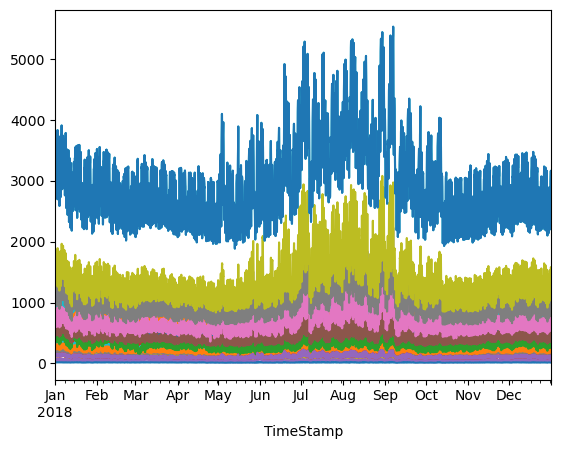

In [4]:
bus_demand_2018.plot(legend=False)

# 2. Write load profile

In [5]:
bus_prop = pd.read_csv(os.path.join(grid_data_dir, 'bus_prop.csv'))

In [6]:
load_profile_out = pd.DataFrame(columns=bus_prop['BUS_I'].values,
                                index=bus_demand_2018.index)

# Update bus-wise load profile in NYCA
load_profile_out.update(bus_demand_2018)

# External load profile are zero
# Import and export flow are set in the generator profiles
load_profile_out = load_profile_out.fillna(0)

<Axes: xlabel='TimeStamp'>

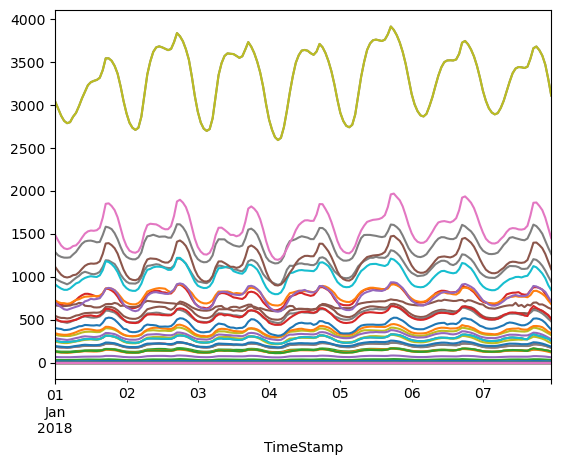

In [7]:
load_profile_out['2018-01-01':'2018-01-07'].plot(legend=False)

<Axes: xlabel='TimeStamp'>

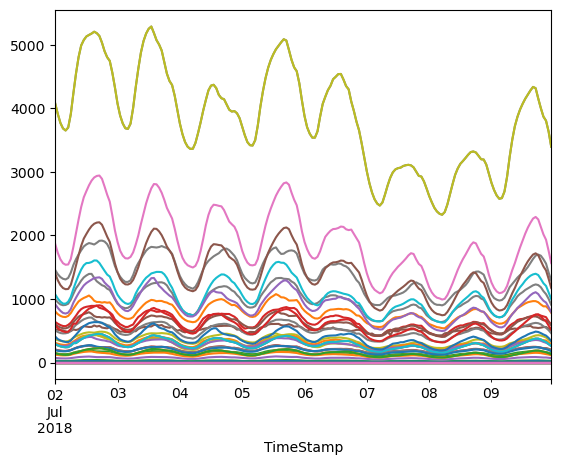

In [8]:
load_profile_out['2018-07-02':'2018-07-09'].plot(legend=False)

In [9]:
load_profile_out.to_csv(os.path.join(grid_data_dir, 'load_profile_2018.csv'))